# Advanced Chromatographic Processes - Exercises

## Exercise 1: Modelling dispersion of valves and tubing

Take the example from the lesson and add tubing using a `TubularReactor` with $L_c = 0.5~m$, $A_c = 1 \cdot 10^{-5}~m^2$, and $D_{ax} = 1 \cdot 10^{-5}~m^2 \cdot s^{-1}$.

***Task:*** Plot the inlet and outlet of every unit operation and compare the results to a system without any considerations for valving and tubing.

In [1]:
n_comp = 2
t_inj = 20
t_cycle = 3600
t_wash = 3600
n_cycles = 4

clr_model = get_clr_template()

## Sections and Connections
clr_model.root.input.solver.sections.nsec = 3
clr_model.root.input.solver.sections.section_times = [0.0, t_inj, (n_cycles)*t_cycle, n_cycles*t_cycle+t_wash]
clr_model.root.input.solver.sections.section_continuity = [0,0]

## Inlet Profile
clr_model.root.input.model.unit_000.sec_000.const_coeff = n_comp*[1.0,]
clr_model.root.input.model.unit_000.sec_001.const_coeff = n_comp*[0.0,]
clr_model.root.input.model.unit_000.sec_002.const_coeff = n_comp*[0.0,]

## Switches
clr_model.root.input.model.connections.nswitches = 3
clr_model.root.input.model.connections.switch_000.section = 0
clr_model.root.input.model.connections.switch_000.connections = [
    0, 1, -1, -1, 2.88e-8,
    1, 2, -1, -1, 2.88e-8,
]
clr_model.root.input.model.connections.switch_001.section = 1
clr_model.root.input.model.connections.switch_001.connections = [
    1, 1, -1, -1, 2.88e-8,
]
clr_model.root.input.model.connections.switch_002.section = 2
clr_model.root.input.model.connections.switch_002.connections = [
    0, 1, -1, -1, 2.88e-8,
    1, 2, -1, -1, 2.88e-8,
]

# set the times that the simulator writes out data for
clr_model.root.input.solver.user_solution_times = np.linspace(0, n_cycles*t_cycle+t_wash, 601)

run_simulation(clr_model)

time = clr_model.root.output.solution.solution_times
c = clr_model.root.output.solution.unit_001.solution_outlet

plt.plot(time, c)

NameError: name 'get_clr_template' is not defined

## Example 2: Carousel System

Consider the following multi column system:

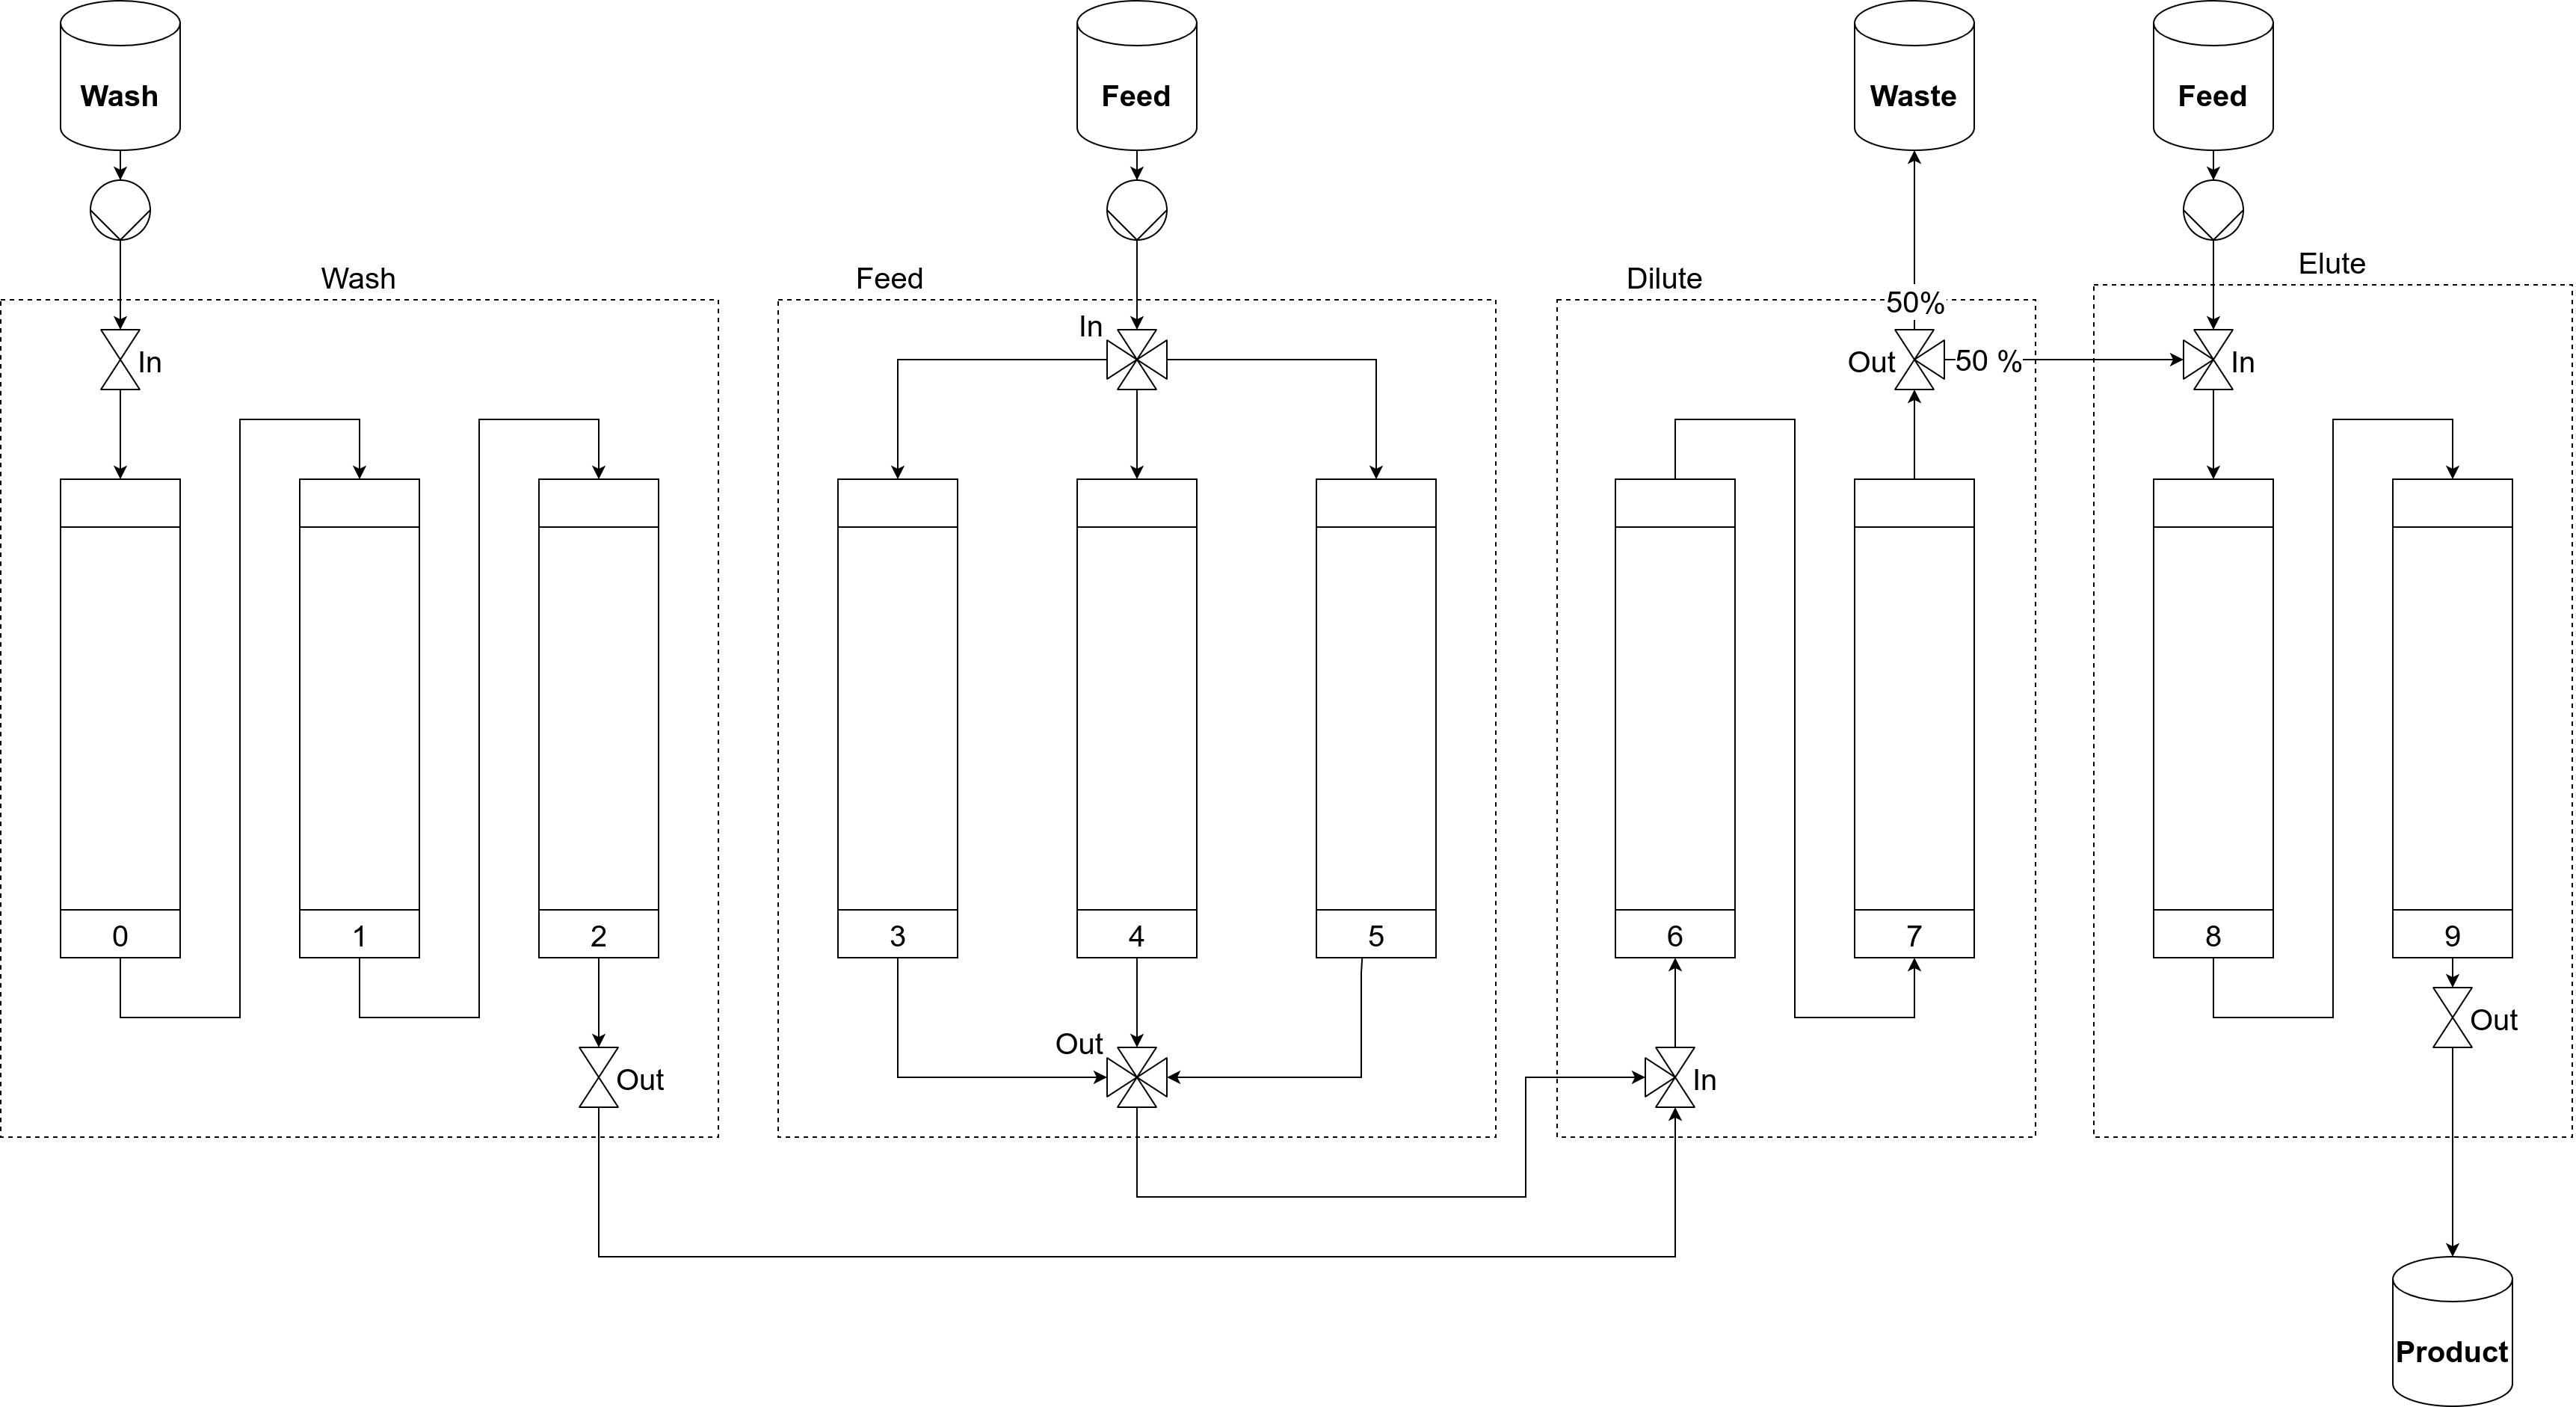

There exist four zones in this system:
- Wash: 3 columns in series
- Feed: 3 columns in parallel
- Dilute: 2 columns in series; reverse flow
- Elute: 2 Columns in series

Now the zones are set up and the reverse flow is set in the dilution zone.

As in the previous example, the units and zones are added and connected in the CarouselBuilder